# Project: Text Clustering for Insurance Company Complaints
- Data source: \
(1) Kaggle dataset: https://www.kaggle.com/datasets/shashwatwork/insurance-company-complaints \
(2) The dataset includes information about complaints filed against various insurance companies. Each row corresponds to a single complaint and details, such as date, reason, subreason, disposition, conclusion.
- Objective: \
Problem: The dataset is not categorized \
Goal: Cluster insurance claim descriptions to identify recurring themes and trends in customer complaints \
(1) Understand common customer concerns \
(2) Detect patterns in complaints to recommend improvements
- Outline \
(1) Data Understanding and exploration \
(2) Preprocessing and Cleaning(EDA) \
(3) Unsupervised Model \
(4) Data Analysis \
(5) Analysis and TakeAways \
(6) Recommendations



In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/text_cluster/Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv'

Mounted at /content/drive


Step 1:Data Understanding and exploration
1. The dataset consists of 14,509 entries and 12 columns, capturing detailed information on insurance claims and related attributes.
2. Here are metadata columns: \
  **"Company"**:  including 623 unique insurers \
  **"File No"**: serving as the ID of each claim \
  **Dates for "Opened" and "Closed"**: claiming timelines with 431 missing closure dates\
  **"Coverage" and "SubCoverage"**: containing highly diverse data with 2,594 missing values in "Coverage" and 9,630 in "SubCoverage" \
  **"Reason" and "SubReason"**: listing the reasons for claims \
  **"Dispositions" and "Conclusions"**: providing insight into the outcomes with 379 missing values in both \
  **"Recovery"**: displaying the reimbursed amount, ranging widely up to 843,825.85, though the majority are zero \
  **"Status"**: revealing that most claims are closed (14,036 out of 14530)


Step 2: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data
1. To better observe the duration of a case, combine the 'Opened' and 'Closed' columns.
2. Each column contains short phrases, as shown by the string length range in the "Reason" and "SubReason" columns. Most rows contain between 12 and 23 characters, making text cleaning relatively straightforward for this dataset.
3. The most common phrases in the "Reason" column include ***Unfair Claims Practice***, ***Marketing Sales***, and ***Practice Unfair***. In the "SubReason" column, frequent phrases are ***Denial of Claim***, ***Claim Delays***, and ***Claim Procedures***.
4. The dataset contains a small number of the following statuses including "Open," "Pre-closed," "Re-open," and "Do Not Purge."
5. By listing the average duration (in months) for claims handled by the top 25 insurers and their highest recovery amounts, it appears these two factors are correlated. Higher recovery amounts often lead to longer claim durations.
6. After analyzing the dataset, the three most common dispositions are ***Company Position Upheld***, ***Furnished Information***, and ***Contract Provision***. Similarly, the most frequent conclusions are ***Justified***, ***Unjustified***, and ***Furnished Information***.




Dataset shape:
 (14509, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14509 entries, 0 to 14508
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      14509 non-null  object 
 1   File No.     14509 non-null  int64  
 2   Opened       14509 non-null  object 
 3   Closed       14078 non-null  object 
 4   Coverage     11915 non-null  object 
 5   SubCoverage  4879 non-null   object 
 6   Reason       14509 non-null  object 
 7   SubReason    14509 non-null  object 
 8   Disposition  14130 non-null  object 
 9   Conclusion   14130 non-null  object 
 10  Recovery     14509 non-null  float64
 11  Status       14509 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB

Dataset info: 
 None

describe:
                          Company       File No.      Opened      Closed  \
count                      14509   14509.000000       14509       14078   
unique                     

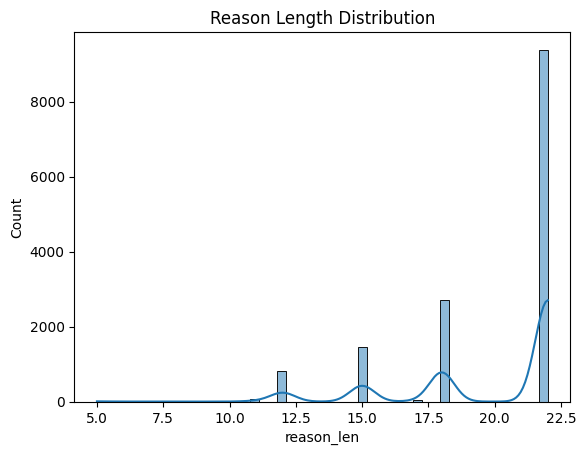

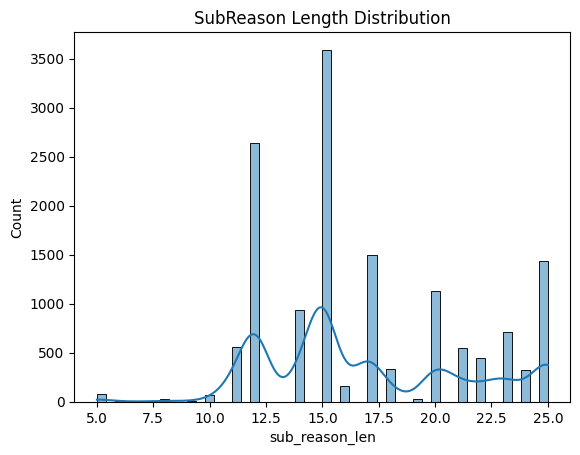

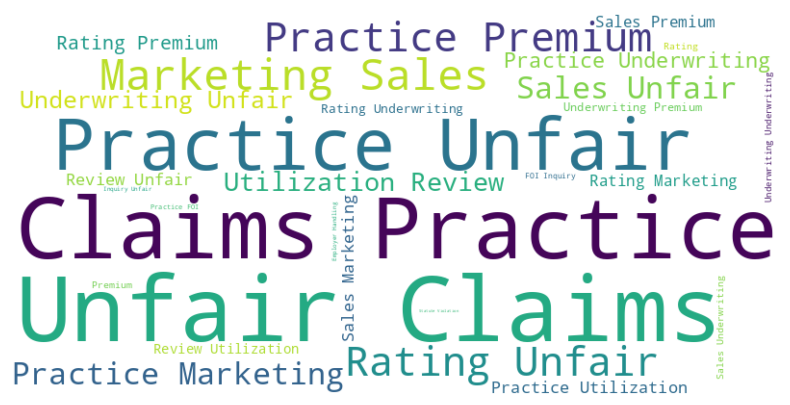


--- Visualizing SubReason WordCloud ---


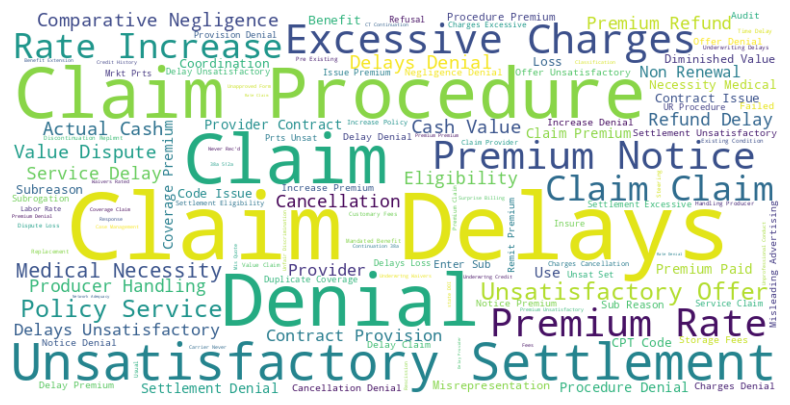

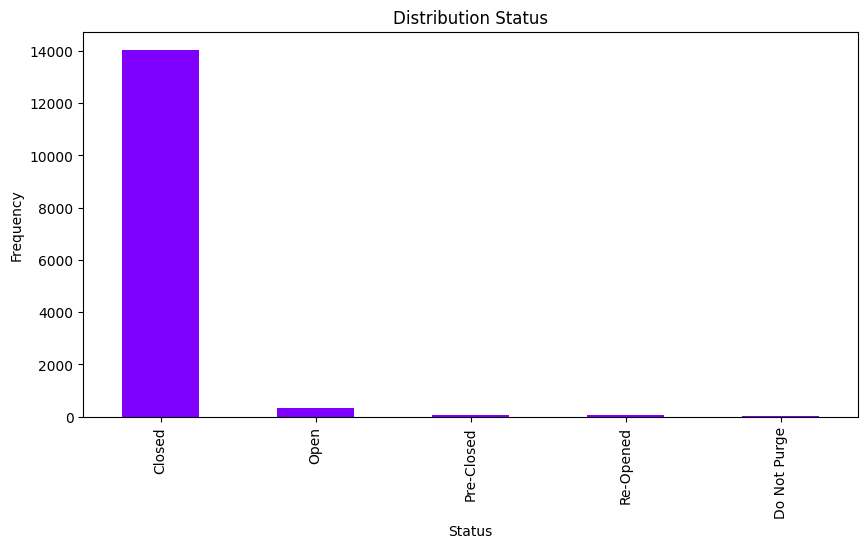

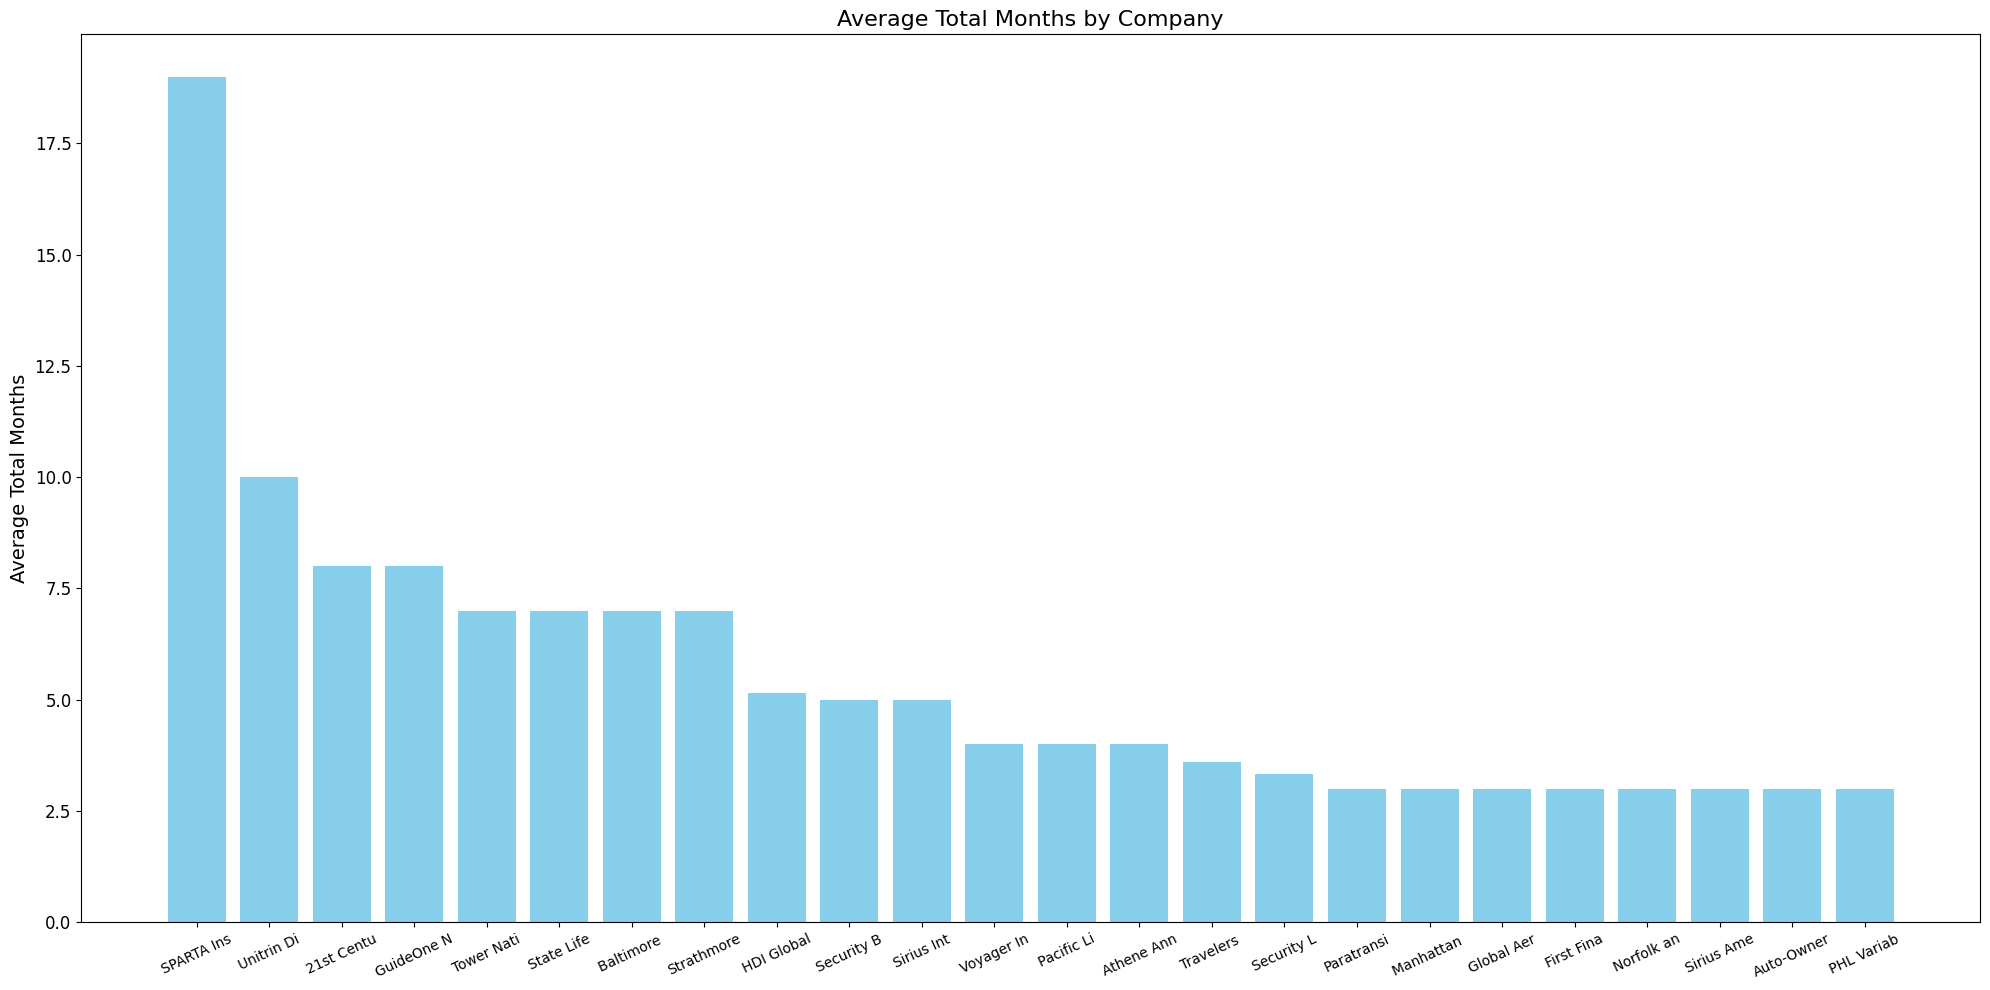

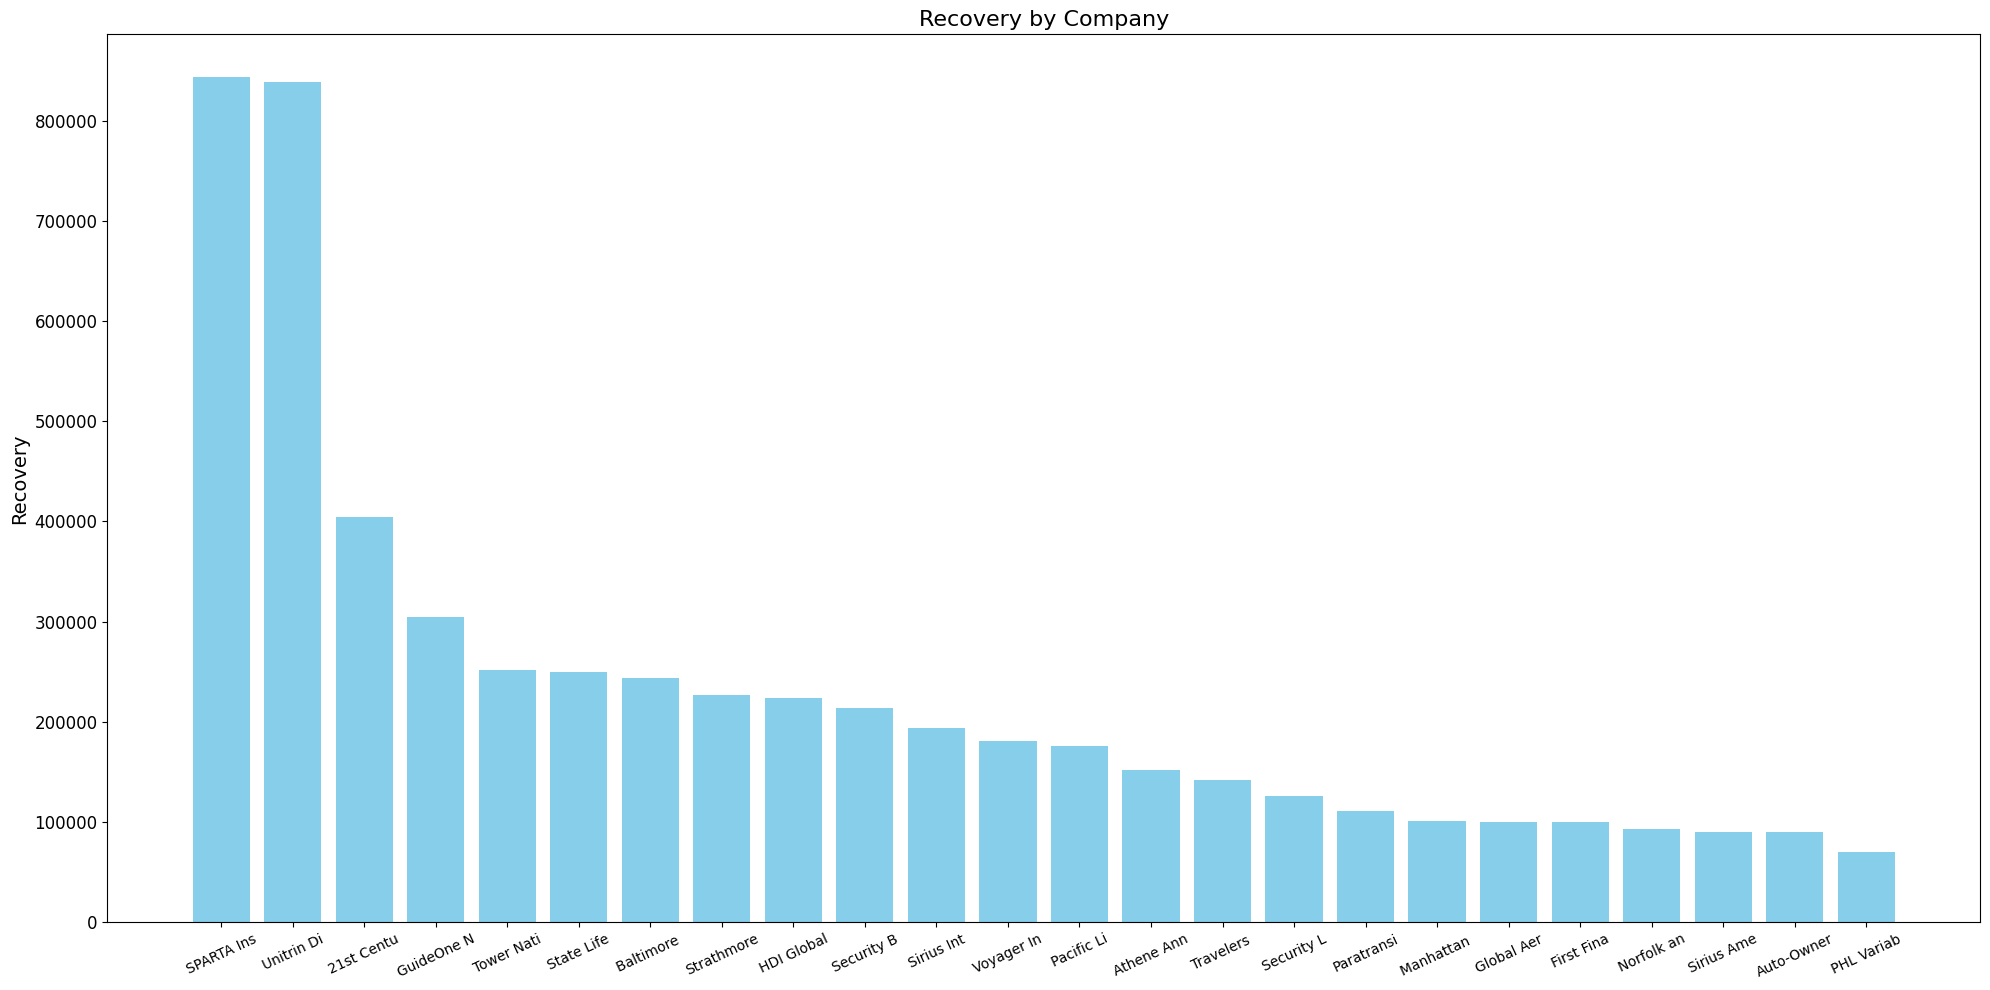

Company: Anthem Health Plans, Inc
  Disposition: {'Furnished Information': 390, 'Claim Settled': 241, 'Contract Provision': 159, 'Company Position Upheld': 91, 'External Review Info Sent': 67, 'Pol Restored/Reinstated': 66, 'Corrective Action': 59, 'Insufficient Information': 45, 'Satisfied': 42, 'Coverage Granted': 39, 'Provider Issue': 35, 'Cancellation Upheld': 34, 'Additional Money Received': 24, 'Claim Paid With Interest': 24, 'Rate Increase Explained': 23, 'Premium Refund': 22, 'Complaint Withdrawn': 20, 'Record Only': 10, 'Policy Issued': 8, 'No Cause For Action': 6, 'Usual & Custom Explained': 6, 'Policy Not In Force': 5, 'Med Jurisdiction Explained': 4, 'Extl Rev Info Sent/SF': 4, 'Federal': 4, 'Coverage Extended': 4, 'Satisfactory Explanation': 3, 'Cancellation Withdrawn': 2, 'Rate Problem Solved': 2, 'Policy Offered': 2, 'Not Insurance Related': 1, 'Other [Enter Disposition]': 1, 'Mediation': 1}
  Conclusion: {'Furnished Information': 1077, 'Justified': 198, 'Voluntary Recon

<Figure size 1400x700 with 0 Axes>

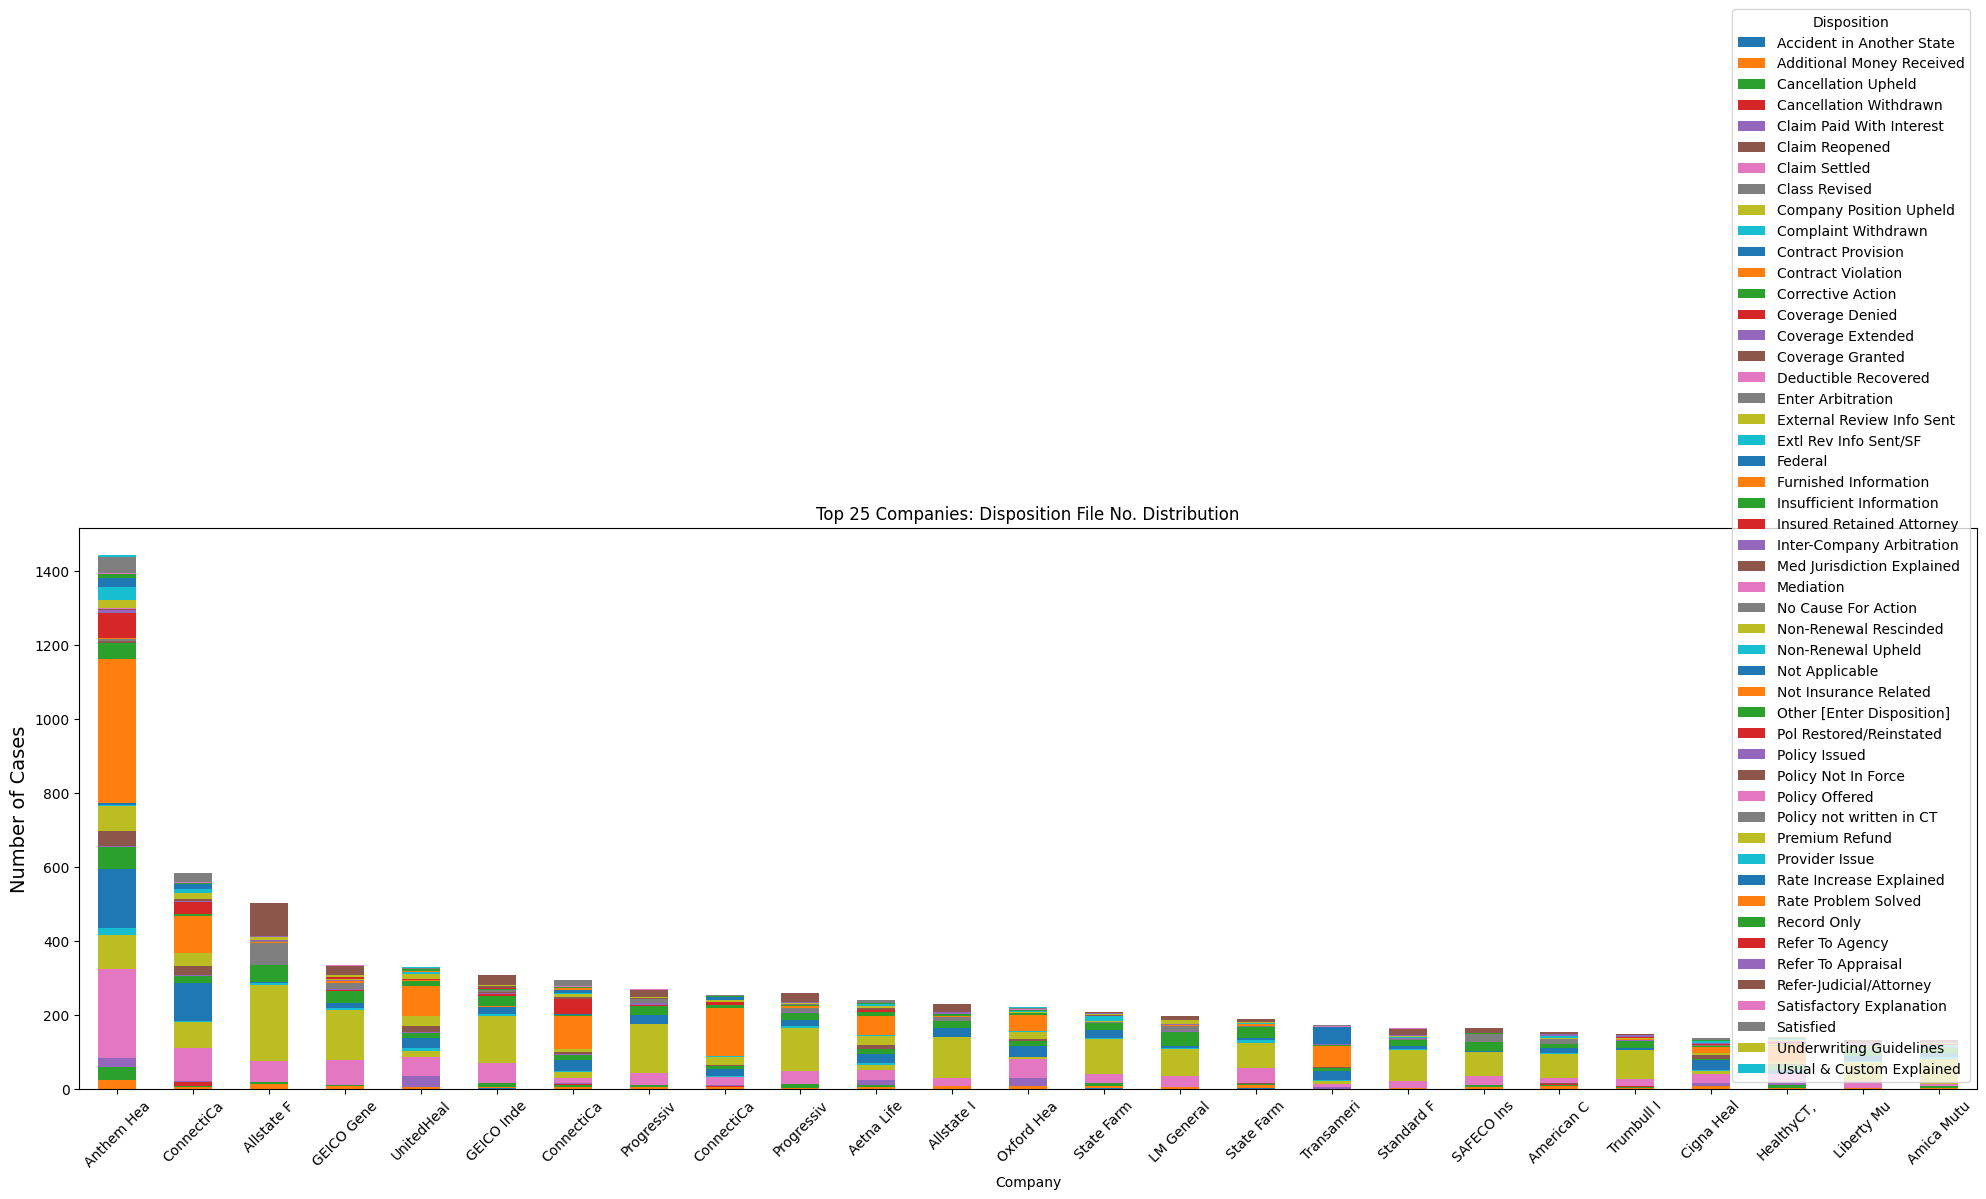

<ipython-input-2-a69e072f571d>:149: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  con_colors = cm.get_cmap("tab20", len(unique_conclusion)).colors


<Figure size 2000x1000 with 0 Axes>

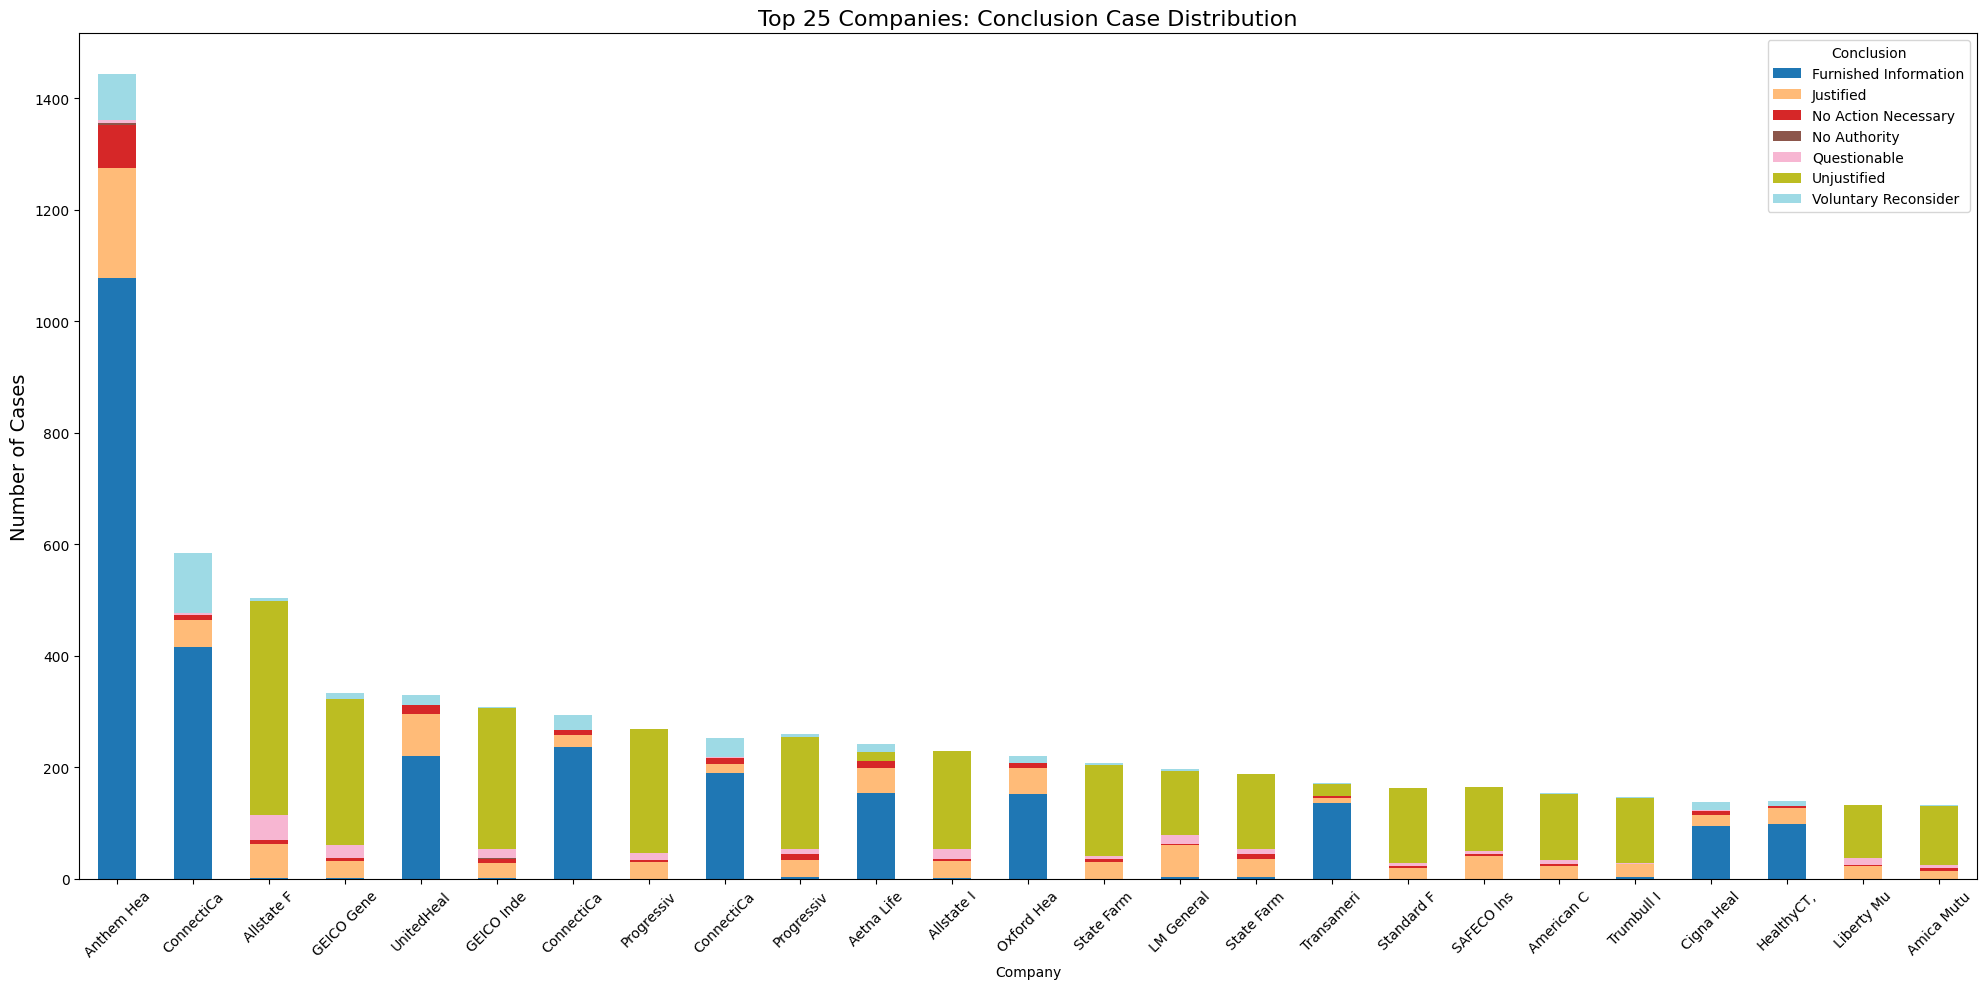

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from wordcloud import WordCloud

df = pd.read_csv(data_path)

print("\nDataset shape:\n", df.shape)
print("\nDataset info: \n", df.info())
print("\ndescribe:\n", df.describe(include='all'))
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Convert the 'Opened' and 'Closed' columns to datetime format
df['Opened'] = pd.to_datetime(df['Opened'], format='%m/%d/%Y')
df['Closed'] = pd.to_datetime(df['Closed'], format='%m/%d/%Y')

def calculate_months(row):
    # Difference in months
    delta = (row['Closed'].year - row['Opened'].year) * 12 + row['Closed'].month - row['Opened'].month
    return delta

df['Total_Months'] = df.apply(calculate_months, axis=1)
print(df.head())

# display the length of Reason and SubReason
df['reason_len'] = df['Reason'].str.len()
sns.histplot(df['reason_len'], bins=50, kde=True)
plt.title("Reason Length Distribution")
plt.show()

df['sub_reason_len'] = df['SubReason'].str.len()
sns.histplot(df['sub_reason_len'], bins=50, kde=True)
plt.title("SubReason Length Distribution")
plt.show()

# Check top common words in Reason and SubReason
text_data = " ".join(df['Reason'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\n--- Visualizing SubReason WordCloud ---")

text_data = " ".join(df['SubReason'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Count Status
status_counts = df['Status'].value_counts()
plt.figure(figsize=(10, 5))
status_counts.plot(kind='bar', cmap='rainbow')
plt.title('Distribution Status')
plt.xlabel('Status')
plt.ylabel('Frequency')


# Plot: Company with Total Months (mean)
company_months = df.groupby(['Company'])['Total_Months'].mean().reset_index()
company_months = company_months.sort_values(by='Total_Months', ascending=False).head(25)

plt.figure(figsize=(20, 10))
plt.bar(company_months['Company'].apply(lambda x: x[:10]), company_months['Total_Months'], color='skyblue', width = 0.8)

plt.title('Average Total Months by Company', fontsize=16)
plt.ylabel('Average Total Months', fontsize=14)
plt.xticks(rotation=25, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Plot: Company with Recovery Amt
company_recovery = df.groupby(['Company'])['Recovery'].max().reset_index()
company_recovery = company_recovery.sort_values(by='Recovery', ascending=False).head(25)

plt.figure(figsize=(20, 10))
plt.bar(company_months['Company'].apply(lambda x: x[:10]), company_recovery['Recovery'], color='skyblue', width = 0.8)

plt.title('Recovery by Company', fontsize=16)
plt.ylabel('Recovery', fontsize=14)
plt.xticks(rotation=25, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot: Disposition and Conclusion by top 25 companies
top_companies = (
    df.groupby("Company")["File No."]
    .count()
    .sort_values(ascending=False)
    .head(25)
    .index
)

top_df = df[df["Company"].isin(top_companies)]

summary = {}

for company in top_companies:
    company_data = top_df[top_df["Company"] == company]
    disposition_counts = company_data["Disposition"].value_counts().to_dict()
    conclusion_counts = company_data["Conclusion"].value_counts().to_dict()
    summary[company] = {
        "Disposition": disposition_counts,
        "Conclusion": conclusion_counts,
    }

for company, stats in summary.items():
    print(f"Company: {company}")
    print(f"  Disposition: {stats['Disposition']}")
    print(f"  Conclusion: {stats['Conclusion']}")
    print("\n")


plt.figure(figsize=(14, 7))
disposition_summary = (
    top_df.groupby(["Company", "Disposition"])["File No."]
    .count()
    .unstack(fill_value=0)
    .loc[top_companies]
)

disposition_summary.index = disposition_summary.index.str[:10]
disposition_summary.plot(kind="bar", stacked=True, figsize=(20, 10))
plt.title("Top 25 Companies: Disposition File No. Distribution", fontsize=12)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 10))
conclusion_summary = (
    top_df.groupby(["Company", "Conclusion"])["File No."]
    .count()
    .unstack(fill_value=0)
    .loc[top_companies]
)

unique_conclusion = conclusion_summary.columns
con_colors = cm.get_cmap("tab20", len(unique_conclusion)).colors
conclusion_summary.index = conclusion_summary.index.str[:10]
conclusion_summary.plot(kind="bar", stacked=True, figsize=(20, 10), color = con_colors)
plt.title("Top 25 Companies: Conclusion Case Distribution", fontsize=16)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 3: Model Architecture \
Approach: TF-IDF Vectorization with K-Means Clustering and Sentence Transformers for Embedding-Based Clustering
1. Text Preprocessing: A custom cleaner removes punctuation and extraneous characters using regular expressions. The text columns (Reason, SubReason, Disposition, and their combination) are processed to generate cleaned text suitable for feature extraction. "Coverage" and "SubCoverage" are not used due to the large amoung of missing values in these columns. Other columns from the previous step are also not good candidates for clustering.
2. Feature Extraction and Clustering: \
  TF-IDF Vectorization: Text data is converted into numerical vectors with n-grams for capturing meaningful word patterns. A maximum of 1,000 features is selected, filtered by min_df (minimum document frequency) and max_df (maximum document frequency).

3. K-Means Clustering: Different numbers of clusters (k=3, 5, 7, 10) are evaluated using the Silhouette Score, which measures cluster quality. The optimal number of clusters (best_k) and the corresponding model are stored.

4. Sentence Transformers: Used as a comparison to TF-IDF, Pre-trained transformer models (in this case all-MiniLM-L6-v2) generate dense sentence embeddings for clustering. This method captures semantic similarities in text better than TF-IDF.

For each clustering approach, the data is visualized with bar charts showing the distribution of cases across clusters.

1. The Silhouette Score evaluates clustering performance by measuring how similar objects within clusters are compared to those in other clusters. Higher scores indicate better-defined clusters. Clusters are analyzed further by extracting top words per cluster using TF-IDF weights, offering insights into the main themes of each cluster.

2. Bar plots display the distribution of cases in clusters for each column. This provides an intuitive understanding of cluster size and patterns.
  Top words per cluster help interpret cluster content, enabling qualitative evaluation.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TF-IDF matrix shape for Reason: (14509, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


TF-IDF + KMeans (k=3) Silhouette Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


TF-IDF + KMeans (k=5) Silhouette Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


TF-IDF + KMeans (k=7) Silhouette Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


TF-IDF + KMeans (k=10) Silhouette Score: 1.0

Best TF-IDF + KMeans result: k=3, Silhouette Score: 1.0


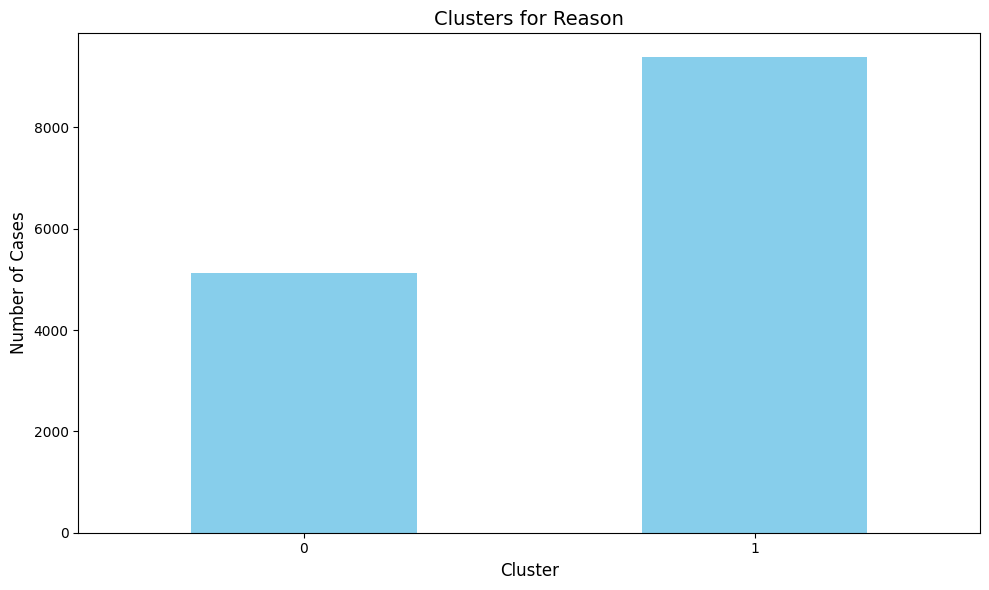

Top features for Reason: ['unfair claims practice']
TF-IDF matrix shape for SubReason: (14509, 19)
TF-IDF + KMeans (k=3) Silhouette Score: 0.877556452876789
TF-IDF + KMeans (k=5) Silhouette Score: 0.9443761970494627
TF-IDF + KMeans (k=7) Silhouette Score: 0.9756216248583544
TF-IDF + KMeans (k=10) Silhouette Score: 0.9929588425152731

Best TF-IDF + KMeans result: k=10, Silhouette Score: 0.9929588425152731


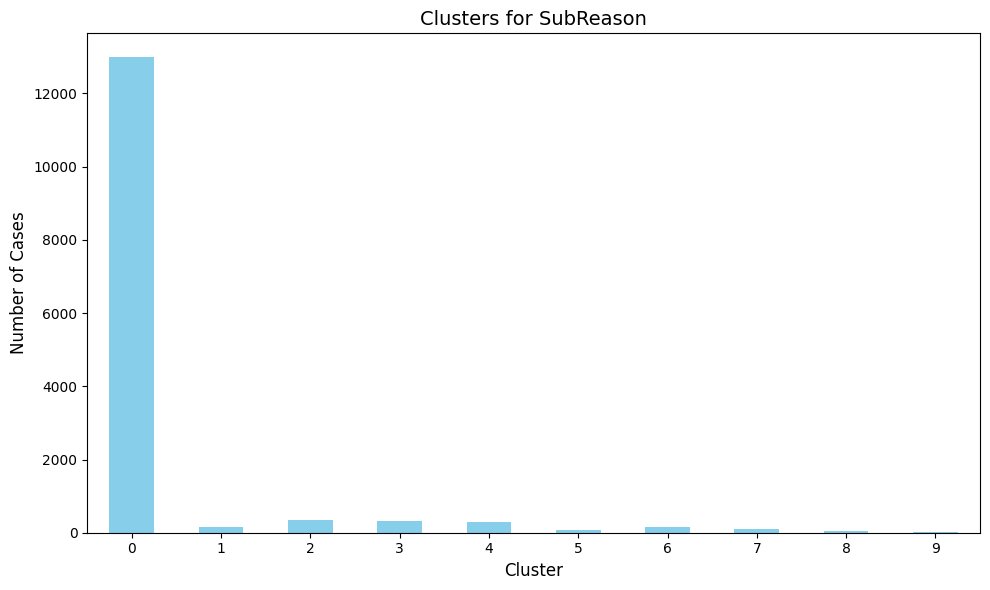

Top features for SubReason: ['actual cash value' 'actual cash value dispute' 'carrier recd appl'
 'carrier recd claim' 'cash value dispute' 'continuation 38a 512a'
 'cpt code issue' 'ct continuation 38a' 'ct continuation 38a 512a'
 'ct state agency']
TF-IDF matrix shape for Disposition: (14509, 18)
TF-IDF + KMeans (k=3) Silhouette Score: 0.9104692128997358
TF-IDF + KMeans (k=5) Silhouette Score: 0.9677045763569451
TF-IDF + KMeans (k=7) Silhouette Score: 0.9903946306990531
TF-IDF + KMeans (k=10) Silhouette Score: 0.9967111046945925

Best TF-IDF + KMeans result: k=10, Silhouette Score: 0.9967111046945925


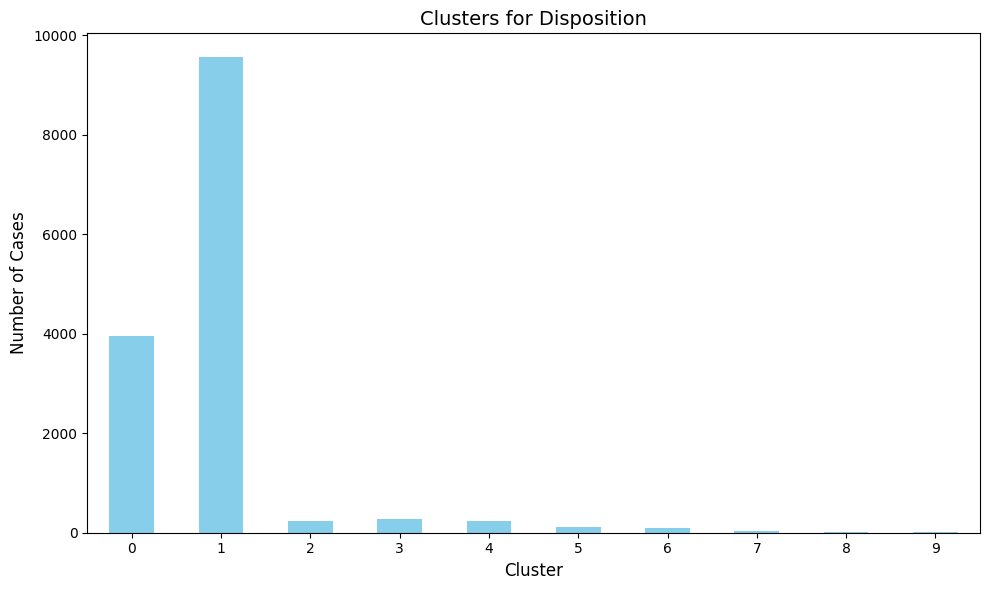

Top features for Disposition: ['additional money received' 'company position upheld'
 'external review info' 'external review info sent' 'extl rev info'
 'extl rev info sentsf' 'filed errorsomission clm'
 'insured retained attorney' 'inter company arbitration'
 'med jurisdiction explained']
TF-IDF matrix shape for Combined_Text: (14509, 1000)
TF-IDF + KMeans (k=3) Silhouette Score: 0.08101807088042744
TF-IDF + KMeans (k=5) Silhouette Score: 0.1457790141045442
TF-IDF + KMeans (k=7) Silhouette Score: 0.16141878196934
TF-IDF + KMeans (k=10) Silhouette Score: 0.18466875379975

Best TF-IDF + KMeans result: k=10, Silhouette Score: 0.18466875379975


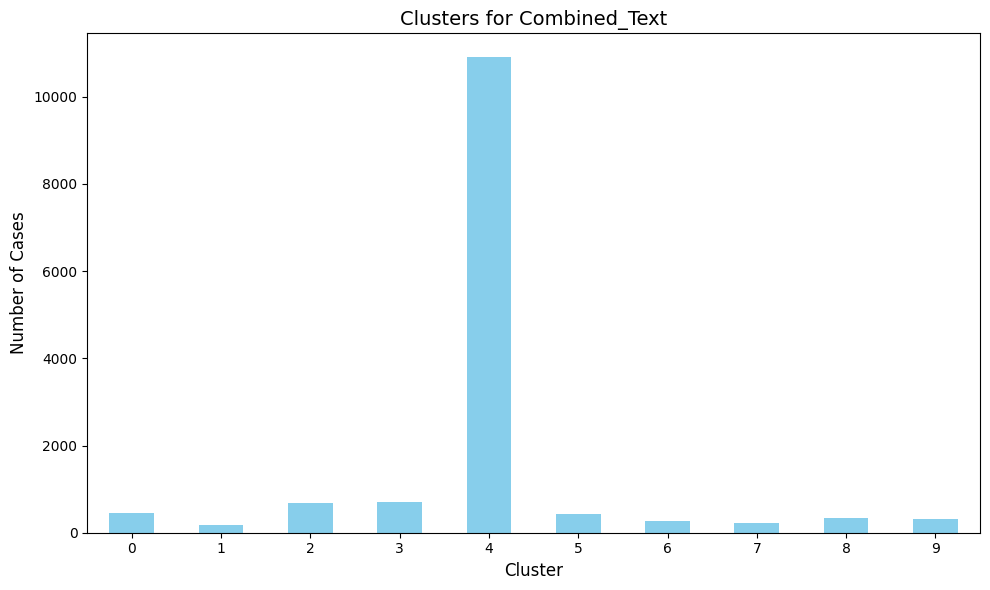

Top features for Combined_Text: ['actual cash value' 'actual cash value dispute'
 'actual cash value dispute claim' 'actual cash value dispute company'
 'actual cash value dispute corrective' 'actual cash value dispute enter'
 'additional money received' 'advertising company position'
 'advertising company position upheld' 'advertising contract provision']
TF-IDF matrix shape for Combined_Text_2: (14509, 1000)
TF-IDF + KMeans (k=3) Silhouette Score: 0.06916741955862332
TF-IDF + KMeans (k=5) Silhouette Score: 0.10594193584162714
TF-IDF + KMeans (k=7) Silhouette Score: 0.1276040126619513
TF-IDF + KMeans (k=10) Silhouette Score: 0.18145699548904912

Best TF-IDF + KMeans result: k=10, Silhouette Score: 0.18145699548904912


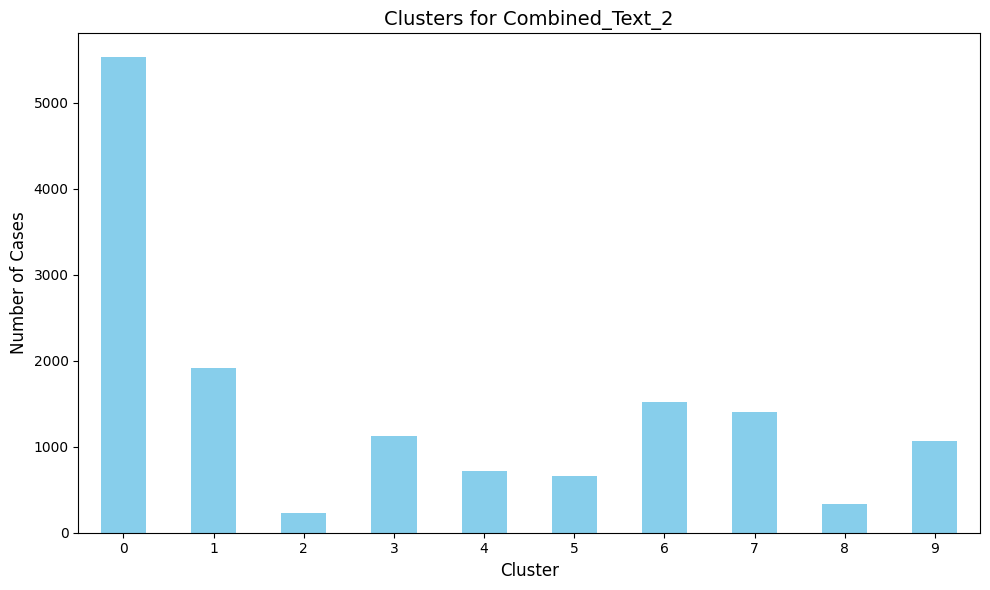

Top features for Combined_Text_2: ['action action necessary' 'action furnished information'
 'actual cash value' 'actual cash value dispute'
 'actual cash value dispute claim' 'actual cash value dispute company'
 'actual cash value dispute enter' 'additional money received'
 'additional money received justified'
 'additional money received unjustified']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

sentence_embedding + KMeans (k=3) Silhouette Score: 0.8171676397323608
sentence_embedding + KMeans (k=5) Silhouette Score: 0.98126620054245
sentence_embedding + KMeans (k=7) Silhouette Score: 0.9929823279380798
sentence_embedding + KMeans (k=10) Silhouette Score: 0.9993141293525696

Best sentence_embedding + KMeans result: k=10, Silhouette Score: 0.9993141293525696

--- SentenceTransformer Results ---
Best K: 10, Silhouette Score: 0.9993141293525696

--- Visualizing Clusters ---


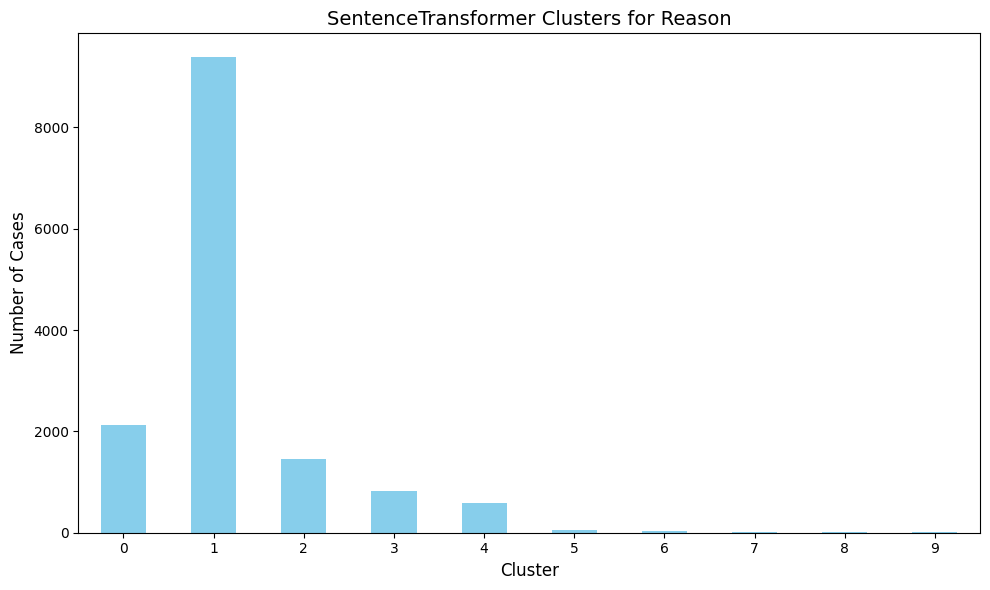

Cluster 0 Keywords: ['rating', 'premium', 'retro', 'review', 'practice', 'employer', 'foi', 'handling', 'inquiry', 'jurisdiction'] for col:Reason
Cluster 1 Keywords: ['claims', 'unfair', 'practice', 'premium', 'employer', 'foi', 'handling', 'inquiry', 'jurisdiction', 'marketing'] for col:Reason
Cluster 2 Keywords: ['sales', 'marketing', 'violation', 'premium', 'employer', 'foi', 'handling', 'inquiry', 'jurisdiction', 'practice'] for col:Reason
Cluster 3 Keywords: ['underwriting', 'violation', 'premium', 'employer', 'foi', 'handling', 'inquiry', 'jurisdiction', 'marketing', 'practice'] for col:Reason
Cluster 4 Keywords: ['utilization', 'review', 'violation', 'practice', 'employer', 'foi', 'handling', 'inquiry', 'jurisdiction', 'marketing'] for col:Reason
Cluster 5 Keywords: ['foi', 'inquiry', 'violation', 'premium', 'employer', 'handling', 'jurisdiction', 'marketing', 'practice', 'rating'] for col:Reason
Cluster 6 Keywords: ['employer', 'handling', 'violation', 'premium', 'foi', 'inquir

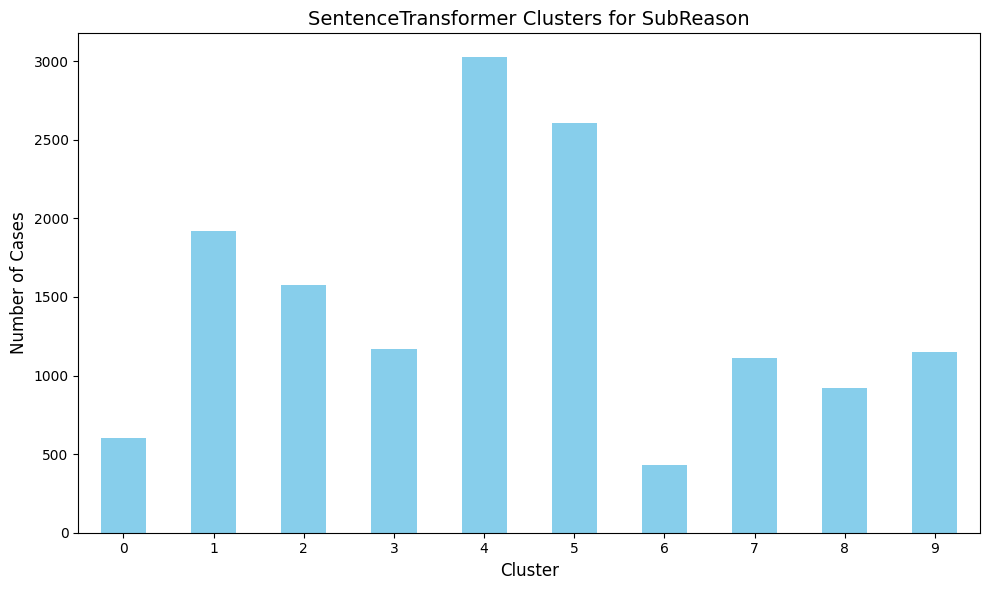

Cluster 0 Keywords: ['excessive', 'charges', 'waivers', 'customary', 'delays', 'denial', 'diminished', 'discontinuation', 'discrimination', 'dispute'] for col:SubReason
Cluster 1 Keywords: ['premium', 'notice', 'rate', 'increase', 'non', 'renewal', 'coverage', 'paid', 'code', 'cpt'] for col:SubReason
Cluster 2 Keywords: ['unsatisfactory', 'settlement', 'offer', 'set', 'unsat', 'prts', 'mrkt', 'discrimination', 'doi', 'dispute'] for col:SubReason
Cluster 3 Keywords: ['provider', 'contract', 'eligibility', 'provision', 'service', 'policy', 'benefit', 'coordination', 'issue', 'mandated'] for col:SubReason
Cluster 4 Keywords: ['denial', 'claim', 'actual', 'cash', 'dispute', 'value', 'misrepresentation', 'refusal', 'insure', 'rec'] for col:SubReason
Cluster 5 Keywords: ['delays', 'claim', 'delay', 'refund', 'policy', 'service', 'premium', 'underwriting', 'time', 'issue'] for col:SubReason
Cluster 6 Keywords: ['handling', 'producer', 'subreason', 'waivers', 'delay', 'delays', 'denial', 'dimi

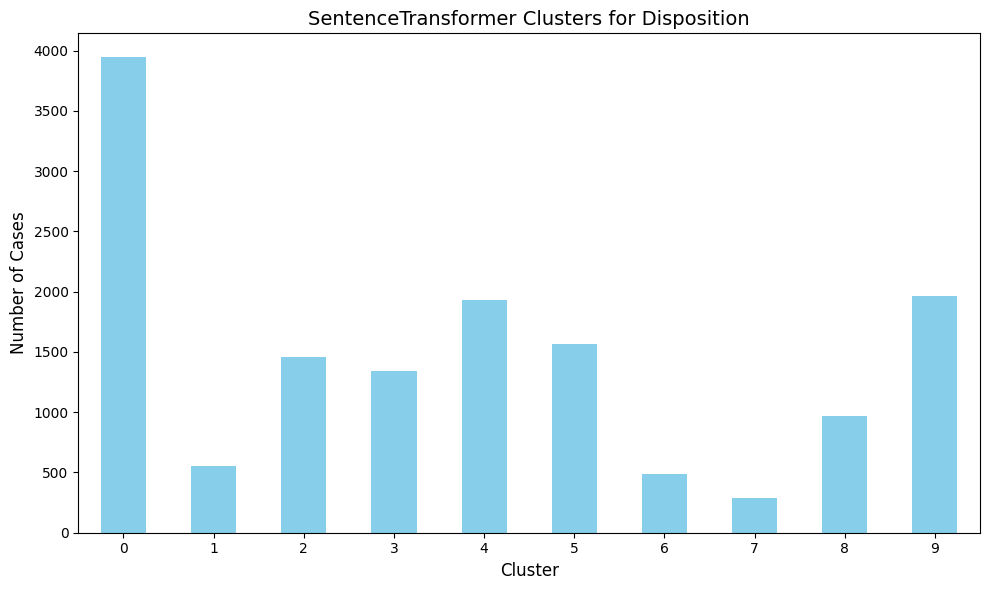

Cluster 0 Keywords: ['position', 'company', 'upheld', 'written', 'fees', 'errors', 'explained', 'explanation', 'extended', 'external'] for col:Disposition
Cluster 1 Keywords: ['satisfied', 'satisfactory', 'explanation', 'filed', 'enter', 'errors', 'explained', 'extended', 'external', 'extl'] for col:Disposition
Cluster 2 Keywords: ['provision', 'contract', 'written', 'disposition', 'errors', 'explained', 'explanation', 'extended', 'external', 'extl'] for col:Disposition
Cluster 3 Keywords: ['corrective', 'action', 'written', 'filed', 'errors', 'explained', 'explanation', 'extended', 'external', 'extl'] for col:Disposition
Cluster 4 Keywords: ['claim', 'settled', 'paid', 'force', 'errors', 'explained', 'explanation', 'extended', 'external', 'extl'] for col:Disposition
Cluster 5 Keywords: ['furnished', 'information', 'written', 'fees', 'enter', 'errors', 'explained', 'explanation', 'extended', 'external'] for col:Disposition
Cluster 6 Keywords: ['received', 'additional', 'money', 'sent',

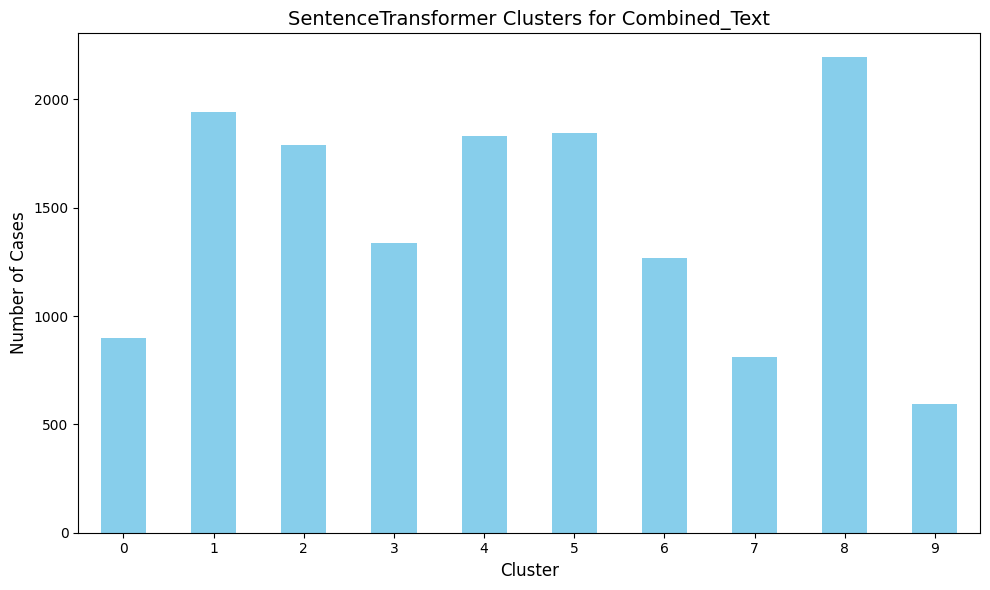

Cluster 0 Keywords: ['premium', 'rating', 'charges', 'excessive', 'position', 'company', 'upheld', 'notice', 'audit', 'corrective'] for col:Combined_Text
Cluster 1 Keywords: ['delays', 'claim', 'claims', 'practice', 'unfair', 'settled', 'position', 'company', 'upheld', 'action'] for col:Combined_Text
Cluster 2 Keywords: ['contract', 'provision', 'practice', 'claims', 'unfair', 'denial', 'claim', 'provider', 'eligibility', 'issue'] for col:Combined_Text
Cluster 3 Keywords: ['sales', 'marketing', 'policy', 'service', 'information', 'furnished', 'delay', 'action', 'corrective', 'handling'] for col:Combined_Text
Cluster 4 Keywords: ['unsatisfactory', 'claims', 'practice', 'unfair', 'settlement', 'settled', 'comparative', 'negligence', 'refer', 'offer'] for col:Combined_Text
Cluster 5 Keywords: ['claim', 'denial', 'practice', 'claims', 'unfair', 'procedure', 'settled', 'information', 'furnished', 'action'] for col:Combined_Text
Cluster 6 Keywords: ['premium', 'rating', 'increase', 'rate', '

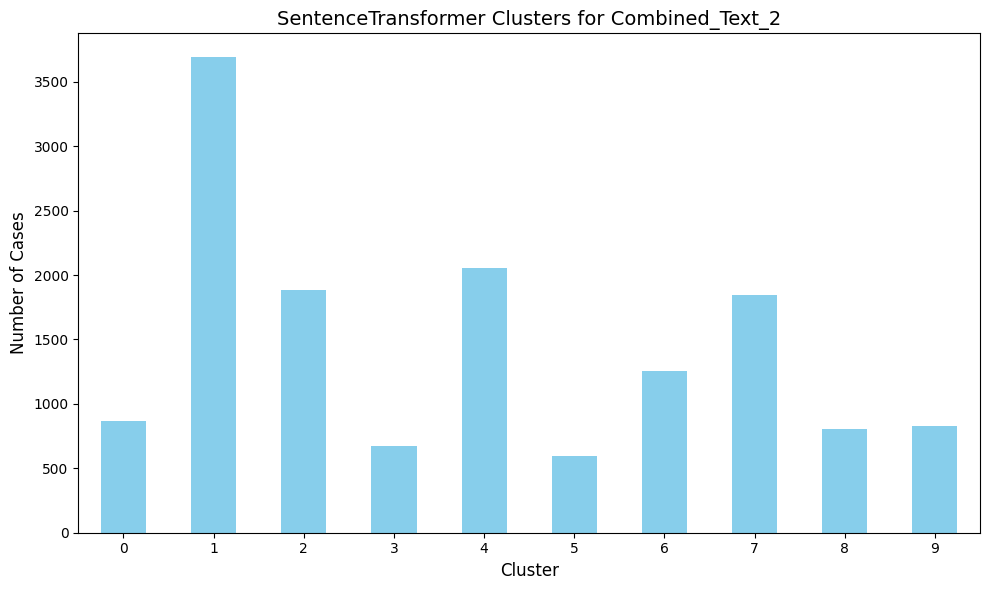

Cluster 0 Keywords: ['premium', 'rating', 'excessive', 'charges', 'position', 'company', 'upheld', 'unjustified', 'notice', 'audit'] for col:Combined_Text_2
Cluster 1 Keywords: ['claim', 'practice', 'claims', 'unfair', 'denial', 'unjustified', 'justified', 'contract', 'provision', 'settled'] for col:Combined_Text_2
Cluster 2 Keywords: ['position', 'company', 'upheld', 'unjustified', 'practice', 'claims', 'unfair', 'denial', 'claim', 'unsatisfactory'] for col:Combined_Text_2
Cluster 3 Keywords: ['information', 'furnished', 'marketing', 'sales', 'policy', 'service', 'coverage', 'premium', 'paid', 'handling'] for col:Combined_Text_2
Cluster 4 Keywords: ['information', 'furnished', 'claims', 'practice', 'unfair', 'claim', 'contract', 'provision', 'denial', 'provider'] for col:Combined_Text_2
Cluster 5 Keywords: ['review', 'utilization', 'necessity', 'medical', 'information', 'furnished', 'sent', 'info', 'external', 'granted'] for col:Combined_Text_2
Cluster 6 Keywords: ['premium', 'rating'

In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def custom_cleaner(text):
	clean_text = re.sub(r'[^\w\s-]', '', text)
	return clean_text.strip()

def process_column(df, column_name, cleaner, ngram_range=(3, 5), max_features=1000, min_df=1, max_df=0.80):
    # Clean the column
    cleaned_col = df[column_name].astype(str).apply(cleaner)

    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features, min_df=min_df, max_df=max_df, stop_words = 'english')
    tfidf_matrix = vectorizer.fit_transform(cleaned_col)
    print(f"TF-IDF matrix shape for {column_name}:", tfidf_matrix.shape)

    # Cluster and evaluate
    best_k, best_score, best_kmeans = k_means_training(tfidf_matrix)
    return tfidf_matrix, vectorizer.get_feature_names_out(), best_k, best_score, best_kmeans

def k_means_training(matrix, num_clusters=[3, 5, 7, 10], matrix_type="TF-IDF"):
    """
    Perform K-Means clustering and evaluate with Silhouette Score.

    Args:
        matrix: The input data matrix (TF-IDF or Sentence Embedding).
        num_clusters (list): List of cluster counts to evaluate.
        matrix_type (str): Specify the type of input matrix, e.g., "TF-IDF" or "Embedding".

    Returns:
        best_k (int): Best number of clusters.
        best_score (float): Best Silhouette Score.
        best_kmeans (KMeans): Best KMeans model.
    """
    best_k = None
    best_score = -1
    best_kmeans = None

    for n_clusters in num_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(matrix)

        # Convert sparse matrix to dense if TF-IDF
        if matrix_type == "TF-IDF":
            matrix_dense = matrix.toarray()
        else:
            matrix_dense = matrix  # Sentence embeddings are typically dense

        if len(set(labels)) > 1:  # Ensure at least two clusters for Silhouette Score
            score = silhouette_score(matrix_dense, labels)
            print(f"{matrix_type} + KMeans (k={n_clusters}) Silhouette Score: {score}")

            if score > best_score:
                best_score = score
                best_k = n_clusters
                best_kmeans = kmeans
        else:
            print(f"{matrix_type} + KMeans (k={n_clusters}): Only one cluster found. Skipping Silhouette Score.")

    print(f"\nBest {matrix_type} + KMeans result: k={best_k}, Silhouette Score: {best_score}")
    return best_k, best_score, best_kmeans

def visualize_clusters(labels, data, title):
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    cluster_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
    plt.title(title, fontsize=14)
    plt.xlabel("Cluster", fontsize=12)
    plt.ylabel("Number of Cases", fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

def sentence_transformer_clustering(cleaned_text, model_name='all-MiniLM-L6-v2', num_clusters=[3, 5, 7, 10]):
    cleaned_text = cleaned_text.fillna('').astype(str).tolist()
    model = SentenceTransformer(model_name)
    sentence_embeddings = model.encode(cleaned_text)
    return k_means_training(sentence_embeddings, num_clusters, 'sentence_embedding')

def extract_top_words_per_cluster(texts, labels, n_top_words=10):
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()

    cluster_texts = {i: [] for i in set(labels)}
    for text, label in zip(texts, labels):
        cluster_texts[label].append(text)

    cluster_keywords = {}
    for cluster, cluster_text in cluster_texts.items():
        cluster_tfidf = tfidf_matrix[labels == cluster]
        word_scores = cluster_tfidf.sum(axis=0).A1
        sorted_indices = word_scores.argsort()[::-1]
        top_words = [feature_names[i] for i in sorted_indices[:n_top_words]]
        cluster_keywords[cluster] = top_words

    return cluster_keywords

df['Combined_Text'] = df[['Reason', 'SubReason', 'Disposition']].apply(
    lambda row: ' '.join(str(x) for x in row), axis=1
)

df['Combined_Text_2'] = df[['Reason', 'SubReason', 'Disposition', 'Conclusion']].apply(
    lambda row: ' '.join(str(x) for x in row), axis=1
)

#unable to proceed conclusion
columns_to_process = ['Reason', 'SubReason', 'Disposition', 'Combined_Text', 'Combined_Text_2']

# TF-IDF Processing and Visualization
for col in columns_to_process:
    tfidf_matrix, feature_names, best_k, best_score, best_kmeans = process_column(
        df, col, custom_cleaner)
    visualize_clusters(best_kmeans.labels_, df[col], f"Clusters for {col}")
    print(f"Top features for {col}:", feature_names[:10])

# SentenceTransformer Processing and Visualization
for col in columns_to_process:
		cleaned_col = df[col].fillna('').astype(str)
		best_k_st, best_score_st, best_kmeans_st = sentence_transformer_clustering(df[col])
		print("\n--- SentenceTransformer Results ---")
		print(f"Best K: {best_k_st}, Silhouette Score: {best_score_st}")
		print("\n--- Visualizing Clusters ---")
		visualize_clusters(best_kmeans_st.labels_, df[col], f"SentenceTransformer Clusters for {col}")
		cluster_keywords = extract_top_words_per_cluster(cleaned_col, best_kmeans_st.labels_)
		for cluster, keywords in cluster_keywords.items():
				print(f"Cluster {cluster} Keywords: {keywords} for col:{col}")


Step 4: Results and Analysis

1. Based on the results from Step 2, I analyzed the clustering performance of different features: **Reason**, **SubReason**, **Disposition**, **Conclusion**, and the combined text columns (**Combined_Text** and **Combined_Text_2**).  
2. All columns, except **Conclusion**, were compatible with KMeans clustering.  
3. To evaluate performance, different values of k were tested to identify the best configuration for clustering.  
4. **Reason**, **SubReason**, and **Disposition** consistently achieved high silhouette scores, all exceeding 0.9, regardless of k, demonstrating their strong clustering potential.  
5. In contrast, the combined text features (**Combined_Text** and **Combined_Text_2**) performed poorly, with silhouette scores below 0.2 across all k values.  
6. Among all features, **Reason** achieved the highest performance, with scores improving from 0.817 at k=3 to 1 at k=10. This indicates that sentence embeddings are particularly effective for clustering this feature.  
7. **SubReason** and **Disposition** showed moderate improvements as k increased, but their maximum scores (0.524 and 0.770, respectively) were significantly lower compared to their performance using regular features.  
8. The combined features (**Combined_Text** and **Combined_Text_2**) showed minimal improvement but remained low overall (below 0.25), suggesting that sentence embeddings are not well-suited for these columns.  
9. Regular features outperformed sentence embeddings in clustering quality for most columns (**Reason**, **SubReason**, and **Disposition**).  
10. The poor performance of the combined text features across both methods suggests that combining text features does not effectively capture meaningful clustering information.  
11. Across all methods, increasing k generally improved silhouette scores, indicating that finer-grained clustering aligns better with the underlying data structure.  





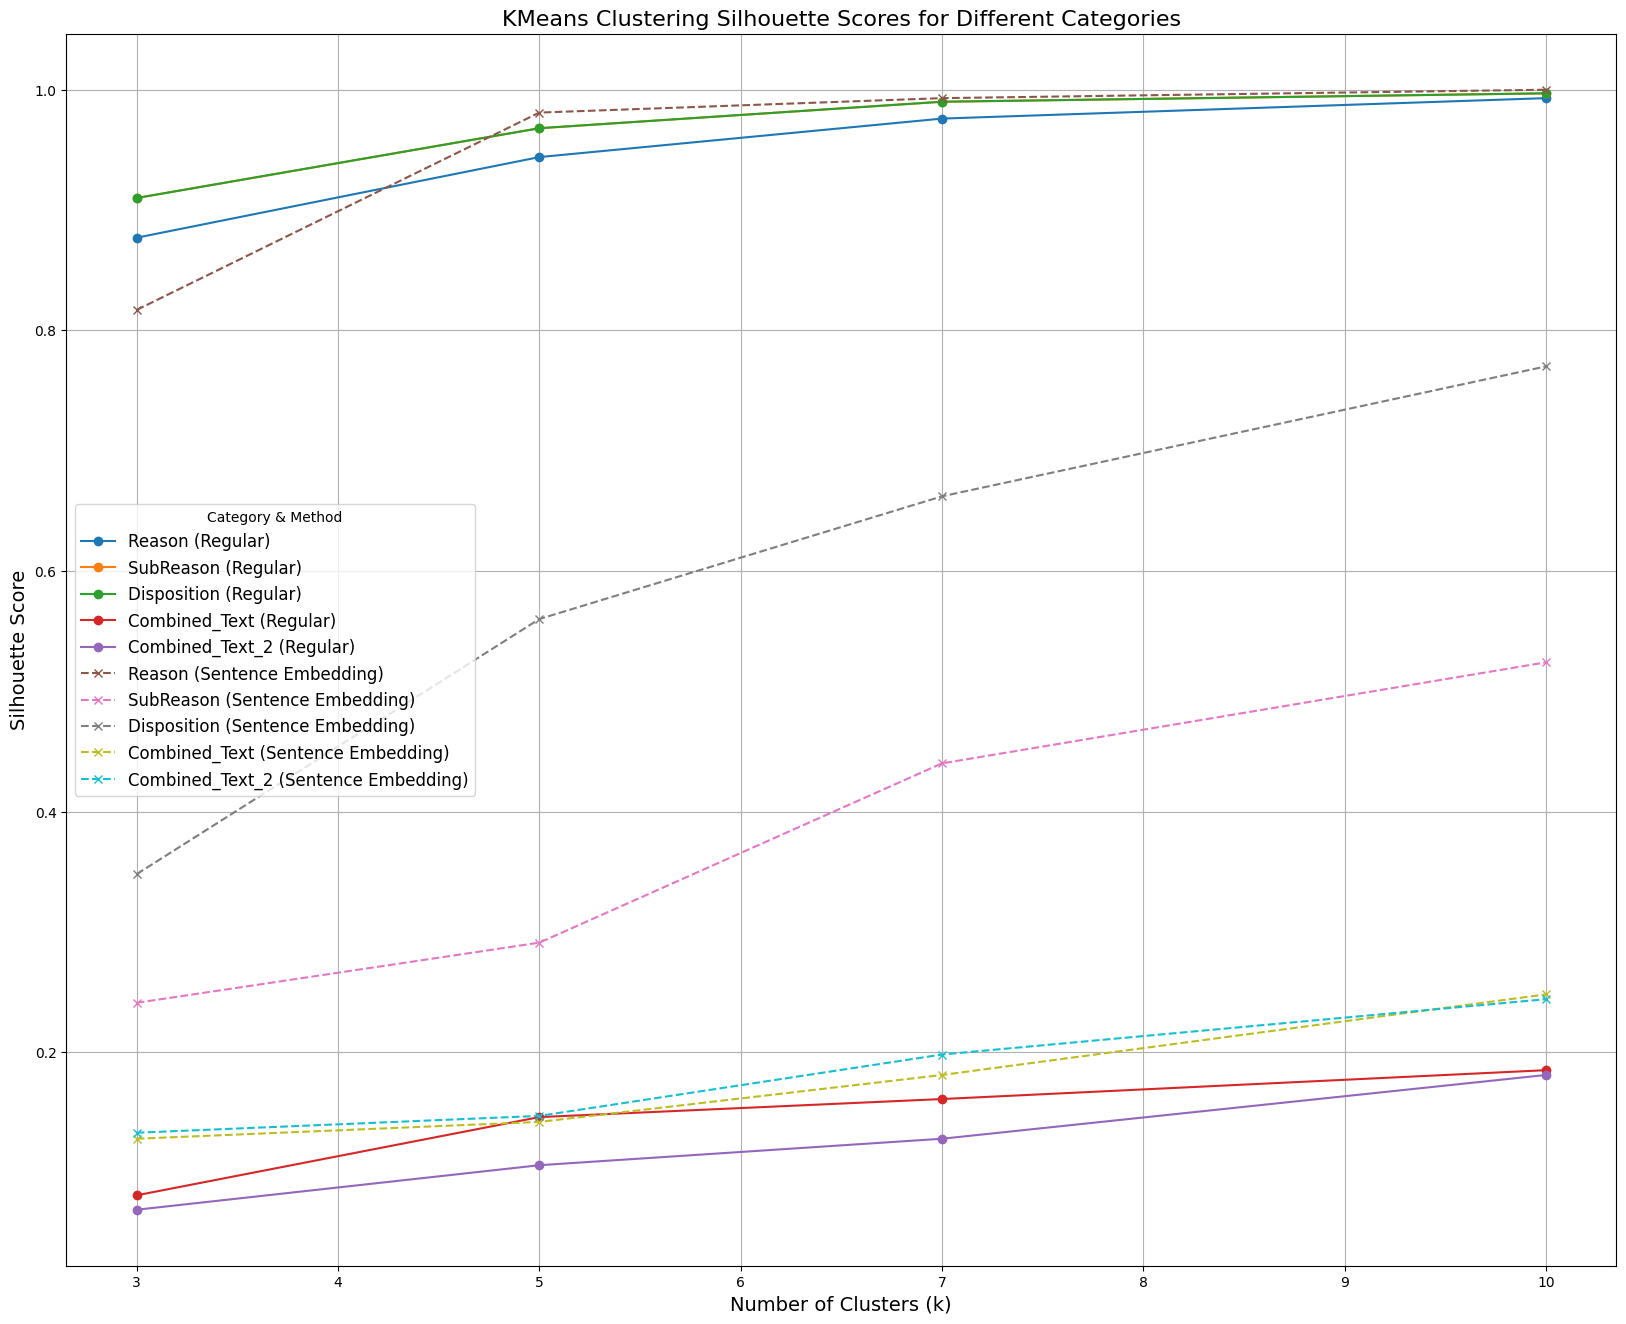

In [9]:
import matplotlib.pyplot as plt

categories = [
    "Reason", "SubReason", "Disposition", "Combined_Text", "Combined_Text_2"
]
k_values = [3, 5, 7, 10]

silhouette_scores = {
    "Reason": [0.877, 0.944, 0.976, 0.993],
    "SubReason": [0.910, 0.968, 0.990, 0.997],
    "Disposition": [0.910, 0.968, 0.990, 0.997],
    "Combined_Text": [0.081, 0.146, 0.161, 0.185],
    "Combined_Text_2": [0.069, 0.106, 0.128, 0.181]
}

silhouette_scores_sentence_embedding = {
    "Reason": [0.817, 0.981, 0.993, 1],
    "SubReason": [0.241, 0.291, 0.440, 0.524],
    "Disposition": [0.348, 0.560, 0.662, 0.770],
    "Combined_Text": [0.128, 0.142, 0.181, 0.248],
    "Combined_Text_2": [0.133, 0.147, 0.198, 0.244]
}

plt.figure(figsize=(20, 16))

# Plot regular silhouette scores
for category, scores in silhouette_scores.items():
    plt.plot(k_values, scores, marker='o', linestyle='-', label=f"{category} (Regular)")

# Plot sentence embedding silhouette scores
for category, scores in silhouette_scores_sentence_embedding.items():
    plt.plot(k_values, scores, marker='x', linestyle='--', label=f"{category} (Sentence Embedding)")

plt.title("KMeans Clustering Silhouette Scores for Different Categories", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(title="Category & Method", fontsize=12, loc='best')
plt.grid(True)
plt.show()


Step 5: Conclusion and Takeaways

Conclusion:

1. **Key Columns for Clustering:** The **Reason**, **SubReason**, and **Disposition** columns consistently deliver the best clustering performance. These features demonstrate strong structure and meaningful separability, making them ideal for clustering tasks.  
2. **Feature Selection and Methodology:**  
   - For most tasks, **regular features** outperform sentence embeddings, providing higher silhouette scores and better-defined clusters.  
   - **Reason** is an exception, where **sentence embeddings** excel at larger k values (e.g., k=10), achieving a silhouette score of 1. This suggests that embeddings capture nuanced relationships in this column that traditional features may miss.  
3. **Avoid Combined Features:** Combined columns (**Combined_Text** and **Combined_Text_2**) consistently perform poorly across both regular features and sentence embeddings. This indicates that merging text features does not enhance clustering and may dilute meaningful information.  
4. **Scalability with k:** Increasing the number of clusters (k) generally improves clustering performance, particularly for columns with strong structure like **Reason**, **SubReason**, and **Disposition**. This suggests finer-grained clustering better aligns with the complexity of the data.  

Takeaways:
  
1. Focus on individual columns (**Reason**, **SubReason**, and **Disposition**) for high-quality clustering results.  
2. Use **sentence embeddings** selectively, such as with the **Reason** column and higher k values, to leverage their potential for capturing complex semantic relationships.  
3. Avoid investing resources into combining features unless there is a clear strategy to extract meaningful interactions.  


Step 6: Recommendations
1. Enhance Combined Features Clustering: Explore advanced techniques like dimensionality reduction (e.g., PCA, t-SNE, UMAP) or feature engineering to better represent combined text columns (Combined_Text and Combined_Text_2).

2. Adopt Advanced Sentence Embeddings: Replace the current sentence embedding approach with BERT-based embeddings or similar transformer-based models. BERT’s ability to understand context and nuances in complex text might significantly improve clustering quality, particularly for features like Combined_Text and Reason, where semantic depth is crucial.

3. Fine-Tune TF-IDF Parameters: Experiment with fine-tuning TF-IDF parameters like max_df (maximum document frequency) and min_df (minimum document frequency) to optimize term weighting. This can reduce the influence of overly common or rare terms, potentially yielding more meaningful clusters. A grid search for hyperparameter tuning could help identify optimal settings.